<a href="https://colab.research.google.com/github/mishad01/Deep-Learning-and-Machine-Learning/blob/main/Pattern%20Recognition/CSE435_final_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd

In [8]:
data = pd.read_csv("/content/drive/MyDrive/Patter Recognition Lab Dataset /House Price Prediction Dataset.csv")

data.head(10)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
5,6,3944,1,2,1,1906,Urban,Poor,No,93262
6,7,3671,1,1,2,1948,Rural,Poor,Yes,448722
7,8,3419,2,4,1,1925,Suburban,Good,Yes,594893
8,9,630,2,2,1,1932,Rural,Poor,Yes,652878
9,10,2185,3,3,1,2000,Downtown,Poor,No,340375


In [9]:
data.isna().sum()

,0
Id,0
Area,0
Bedrooms,0
Bathrooms,0
Floors,0
YearBuilt,0
Location,0
Condition,0
Garage,0
Price,0


In [10]:
data.shape

(2000, 10)

In [11]:
from sklearn import preprocessing

col_cat = ['Location','Condition','Garage']

label_encoder = preprocessing.LabelEncoder()

for col in col_cat:
  data[col] = label_encoder.fit_transform(data[col])

data.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,0,0,0,149919
1,2,4272,5,4,3,1958,0,0,0,424998
2,3,3592,2,2,3,1938,0,2,0,266746
3,4,966,4,2,2,1902,2,1,1,244020
4,5,4926,1,4,2,1975,0,1,1,636056


In [12]:
X = data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8,]].values
y = data.iloc[:, 9].values

In [13]:
y[0]

np.int64(149919)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(2000, 9)
(1600, 9)
(400, 9)
(1600,)


In [15]:
# feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(max_iter=2000, hidden_layer_sizes=(64, 128, 256), activation="relu",random_state=42)
model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(64, 128, 256), max_iter=2000, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor(n_estimators=150, max_depth=5, min_samples_leaf=10, min_samples_split=10)
model2.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=10,
                      n_estimators=150)

In [18]:
y_pred1 = model.predict(X_test)

y_pred2 = model2.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

mse1 = mean_squared_error(y_test, y_pred1)
mse2 = mean_squared_error(y_test, y_pred2)

mae1 = mean_absolute_error(y_test, y_pred1)
mae2 = mean_absolute_error(y_test, y_pred2)

rmse1 = root_mean_squared_error(y_test, y_pred1)
rmse2 = root_mean_squared_error(y_test, y_pred2)

print(f"Mean Squared Error of MLP regressor: {mse1}")
print(f"Mean Squared Error of Random forest: {mse2}\n")

print(f"Mean Absolute Error of MLP regressor: {mae1}")
print(f"Mean Absolute Error of RF: {mae2}\n")

print(f"Root mean squared error of MLP regressor: {rmse1}")
print(f"Root mean sqaured error of RF: {rmse2}\n")


Mean Squared Error of MLP regressor: 74431177971.21909
Mean Squared Error of Random forest: 71061159070.24303

Mean Absolute Error of MLP regressor: 231414.77525375836
Mean Absolute Error of RF: 227645.6071396776

Root mean squared error of MLP regressor: 272820.7799476042
Root mean sqaured error of RF: 266572.9901363659



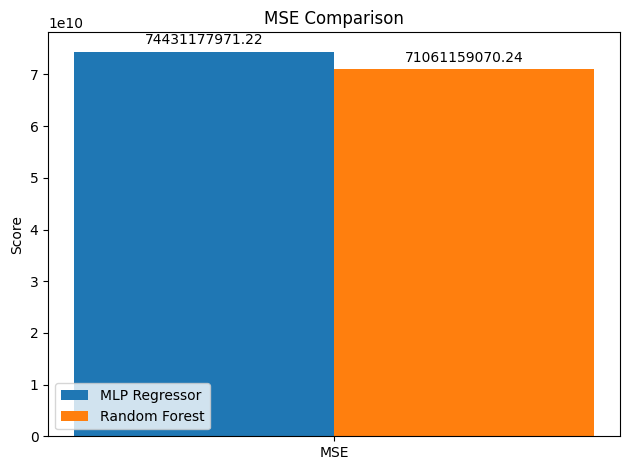

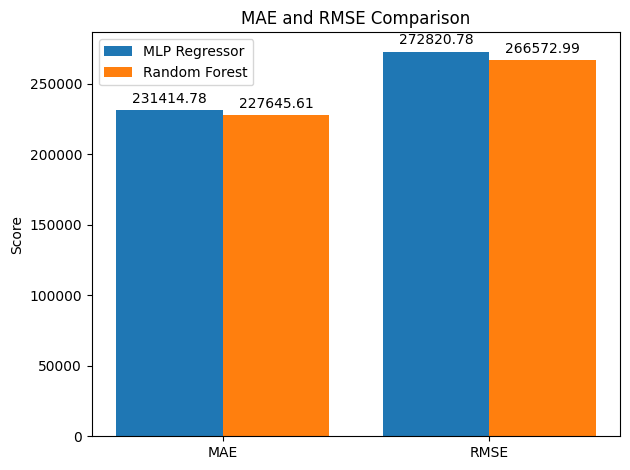

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics
metrics1 = ["MSE"]
metrics2 = ["MAE", "RMSE"]

mlp_scores1 = [mse1]
rf_scores1 = [mse2]

mlp_scores2 = [mae1, rmse1]
rf_scores2 = [mae2, rmse2]

# Plot MSE separately
x1 = np.arange(len(metrics1))
width = 0.4

fig, ax = plt.subplots()
bars1 = ax.bar(x1 - width/2, mlp_scores1, width, label='MLP Regressor')
bars2 = ax.bar(x1 + width/2, rf_scores1, width, label='Random Forest')

ax.set_ylabel('Score')
ax.set_title('MSE Comparison')
ax.set_xticks(x1)
ax.set_xticklabels(metrics1)
ax.legend()

for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Plot MAE and RMSE together
x2 = np.arange(len(metrics2))

fig, ax = plt.subplots()
bars1 = ax.bar(x2 - width/2, mlp_scores2, width, label='MLP Regressor')
bars2 = ax.bar(x2 + width/2, rf_scores2, width, label='Random Forest')

ax.set_ylabel('Score')
ax.set_title('MAE and RMSE Comparison')
ax.set_xticks(x2)
ax.set_xticklabels(metrics2)
ax.legend()

for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()
